# Convolutional Neural Networks and Computer Vision

In [19]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os

## Preprocessing images

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

#preprocess data (and scaling)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

dir_path = 'pizza_steak'
train_dir = os.path.join(dir_path,'train')
test_dir = os.path.join(dir_path,'test')

#import data and turn to batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                                batch_size=32,
                                                target_size=(224,224),
                                                class_mode='binary',
                                                seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                                batch_size=32,
                                                target_size=(224,224),
                                                class_mode='binary',
                                                seed=42)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [33]:
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([ 
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(filters= 32,kernel_size= (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), padding='valid'),

    tf.keras.layers.Conv2D(filters= 64,kernel_size= (3,3), activation='relu'),
    tf.keras.layers.Conv2D(filters= 64,kernel_size= (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), padding='valid'),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), 
                metrics=['accuracy'])

history_1 = model_1.fit(train_data, epochs=5, 
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, 
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 130s 3s/step - loss: 0.6036 - accuracy: 0.6733 - val_loss: 0.4015 - val_accuracy: 0.8160
Epoch 2/5
47/47 [==============================] - 139s 3s/step - loss: 0.4552 - accuracy: 0.7913 - val_loss: 0.4651 - val_accuracy: 0.7860
Epoch 3/5
47/47 [==============================] - 140s 3s/step - loss: 0.4559 - accuracy: 0.8007 - val_loss: 0.3669 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 140s 3s/step - loss: 0.3844 - accuracy: 0.8340 - val_loss: 0.3443 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 140s 3s/step - loss: 0.3481 - accuracy: 0.8520 - val_loss: 0.3200 - val_accuracy: 0.8640


> **steps_per_epoch** is batches of samples to train. It is used to define how many batches of samples to use in one epoch.

In [32]:
len(train_data) , 1500/32

(47, 46.875)

In [51]:
model_1.evaluate(valid_data)

16/16 [==============================] - 7s 436ms/step - loss: 0.3200 - accuracy: 0.8640


[0.3199547529220581, 0.8640000224113464]

In [163]:
predict_proba = model_1.predict(valid_data)
predict_proba[:5]

array([[0.06049123],
       [0.05601552],
       [0.12031013],
       [0.66150934],
       [0.3177836 ]], dtype=float32)

In [164]:
predictions = np.round(predict_proba).reshape(-1,)
predictions[:5]

array([0., 0., 0., 1., 0.], dtype=float32)

In [165]:
class_name = list(valid_data.class_indices.keys())
class_name

['pizza', 'steak']

In [173]:
images, labels = valid_data.next() # first bathces(32 images)

In [171]:
images[0].shape, labels[0]

((224, 224, 3), 1.0)

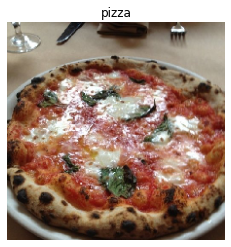

In [174]:
plt.imshow(images[30])
plt.title(class_name[int(labels[30])])
plt.axis('off');